In [3]:
import tensorflow as tf
import keras
from keras import layers,models
import matplotlib.pyplot as plt
import numpy as np

In [135]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=35

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
for image_batch,labels_batch in  dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 2 1 0 2 0 1 1 1 0 2 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1]


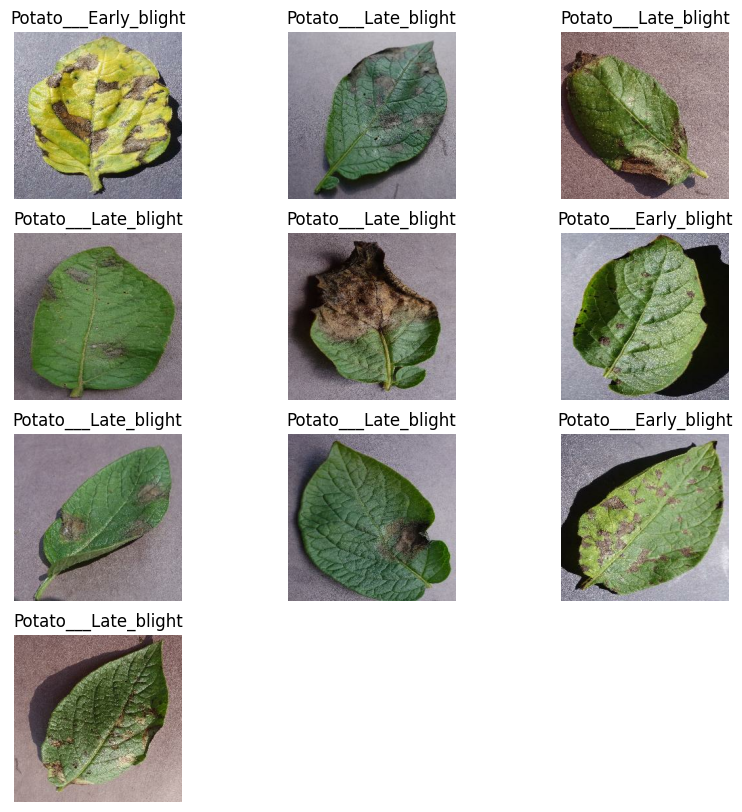

In [6]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in  dataset.take(1):
    for i in range(10):
        ax=plt.subplot(4,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [7]:
train_size=0.8
print(len(dataset))
len(dataset)*train_size

68


54.400000000000006

In [8]:
train_ds=dataset.take(54)
len(train_ds)

54

In [9]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [10]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [11]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [12]:
def getDatasetPartition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    assert(train_split+val_split+test_split)==1
    ds_size=len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_size=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [13]:
train_ds,val_ds,test_ds=getDatasetPartition(dataset)

In [14]:
print(len(train_ds),len(val_ds),len(test_ds))

54 6 8


In [15]:
train_ds=train_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
for image_batch,labels_batch in  dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.62352943 0.6313726  0.68235296]
  [0.6156863  0.62352943 0.6745098 ]
  [0.6        0.60784316 0.65882355]
  ...
  [0.72156864 0.7137255  0.75686276]
  [0.7176471  0.70980394 0.7529412 ]
  [0.7176471  0.70980394 0.7529412 ]]

 [[0.6156863  0.62352943 0.6745098 ]
  [0.6039216  0.6117647  0.6627451 ]
  [0.59607846 0.6039216  0.654902  ]
  ...
  [0.7411765  0.73333335 0.7764706 ]
  [0.7529412  0.74509805 0.7882353 ]
  [0.75686276 0.7490196  0.7921569 ]]

 [[0.627451   0.63529414 0.6862745 ]
  [0.61960787 0.627451   0.6784314 ]
  [0.6117647  0.61960787 0.67058825]
  ...
  [0.7294118  0.72156864 0.7647059 ]
  [0.7372549  0.7294118  0.77254903]
  [0.74509805 0.7372549  0.78039217]]

 ...

 [[0.45490196 0.44313726 0.47843137]
  [0.44313726 0.43137255 0.46666667]
  [0.48235294 0.47058824 0.5058824 ]
  ...
  [0.5803922  0.5686275  0.6039216 ]
  [0.54509807 0.53333336 0.5686275 ]
  [0.54901963 0.5372549  0.57254905]]

 [[0.39607844 0.38431373 0.41960785]
  [0.4117647  0.4        0.43529412]


In [17]:
resize_and_rescale = keras.Sequential([
     layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
     layers.Rescaling(1.0/255)
])

In [18]:
data_augmentation = keras.Sequential([
     layers.RandomFlip("horizontal_and_vertical"),
     layers.RandomRotation(0.2)
])

In [136]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model1=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])
model1.build(input_shape=input_shape)

In [137]:
model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (32, 28, 28, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (32, 14, 14, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (32, 25088)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (32, 64)                    │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,736,067 (6.62 MB)

 Trainable params: 1,736,067 (6.62 MB)

 Non-trainable params: 0 (0.00 B)

In [138]:
model1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [139]:
history = model1.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.5542 - loss: 0.8752 - val_accuracy: 0.8177 - val_loss: 0.4523
Epoch 2/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8157 - loss: 0.4679 - val_accuracy: 0.8854 - val_loss: 0.2630
Epoch 3/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.8743 - loss: 0.2938 - val_accuracy: 0.9271 - val_loss: 0.1994
Epoch 4/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9408 - loss: 0.1752 - val_accuracy: 0.9583 - val_loss: 0.1397
Epoch 5/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9438 - loss: 0.1492 - val_accuracy: 0.9271 - val_loss: 0.2104
Epoch 6/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9539 - loss: 0.1354 - val_accuracy: 0.9271 - val_loss: 0.2002
Epoch 7/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.9371 - loss: 0.1440 - val_accuracy: 0.9427 - val_loss: 0.1129
Epoch 8/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9713 - loss: 0.0867 - val_accuracy: 0.9688 - val_loss:

In [140]:
scores=model1.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 583ms/step - accuracy: 0.9864 - loss: 0.0287


In [141]:
scores

[0.041479386389255524, 0.9784482717514038]

In [49]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

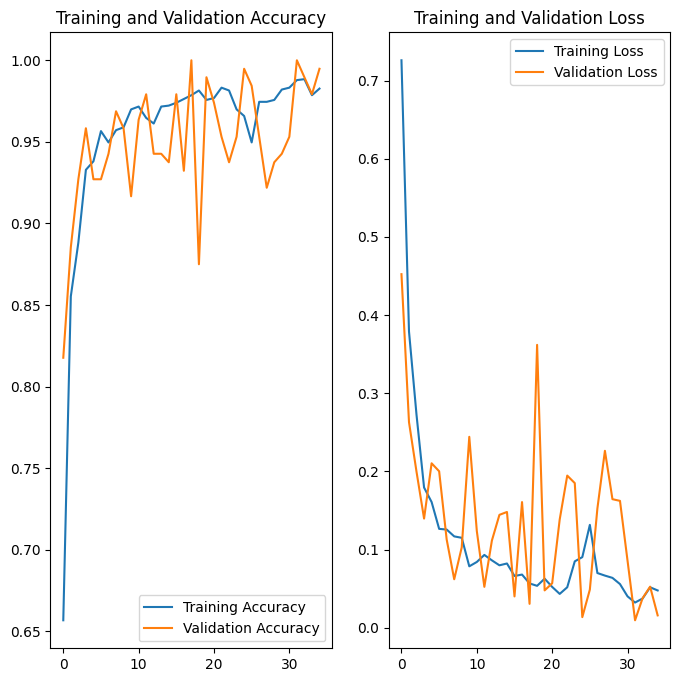

In [142]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(EPOCHS), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), history.history['loss'], label='Training Loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [5]:
plt.figure(figsize=(15,15))
for image_batch,label_batch in test_ds.take(1):
    for i in range(15):
         ax = plt.subplot(5, 3, i + 1)
         plt.imshow(image_batch[i].numpy().astype("uint8"))
         plt.title(f"Actual : {class_names[label_batch[i].numpy()]} \n Predicted : {class_names[np.argmax(batch_prediction[i])]}")
         plt.axis("off")
         
         # image=image_batch[i].numpy().astype("uint8")
         # print("Image to predict")
         # # plt.imshow(image)
         # print("Actual Label : ", class_names[label_batch[i].numpy()])
         # batch_prediction=model1.predict(image_batch)
         # print("Prediction is : ",class_names[np.argmax(batch_prediction[i])])

NameError: name 'test_ds' is not defined

<Figure size 1500x1500 with 0 Axes>

In [94]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 8 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

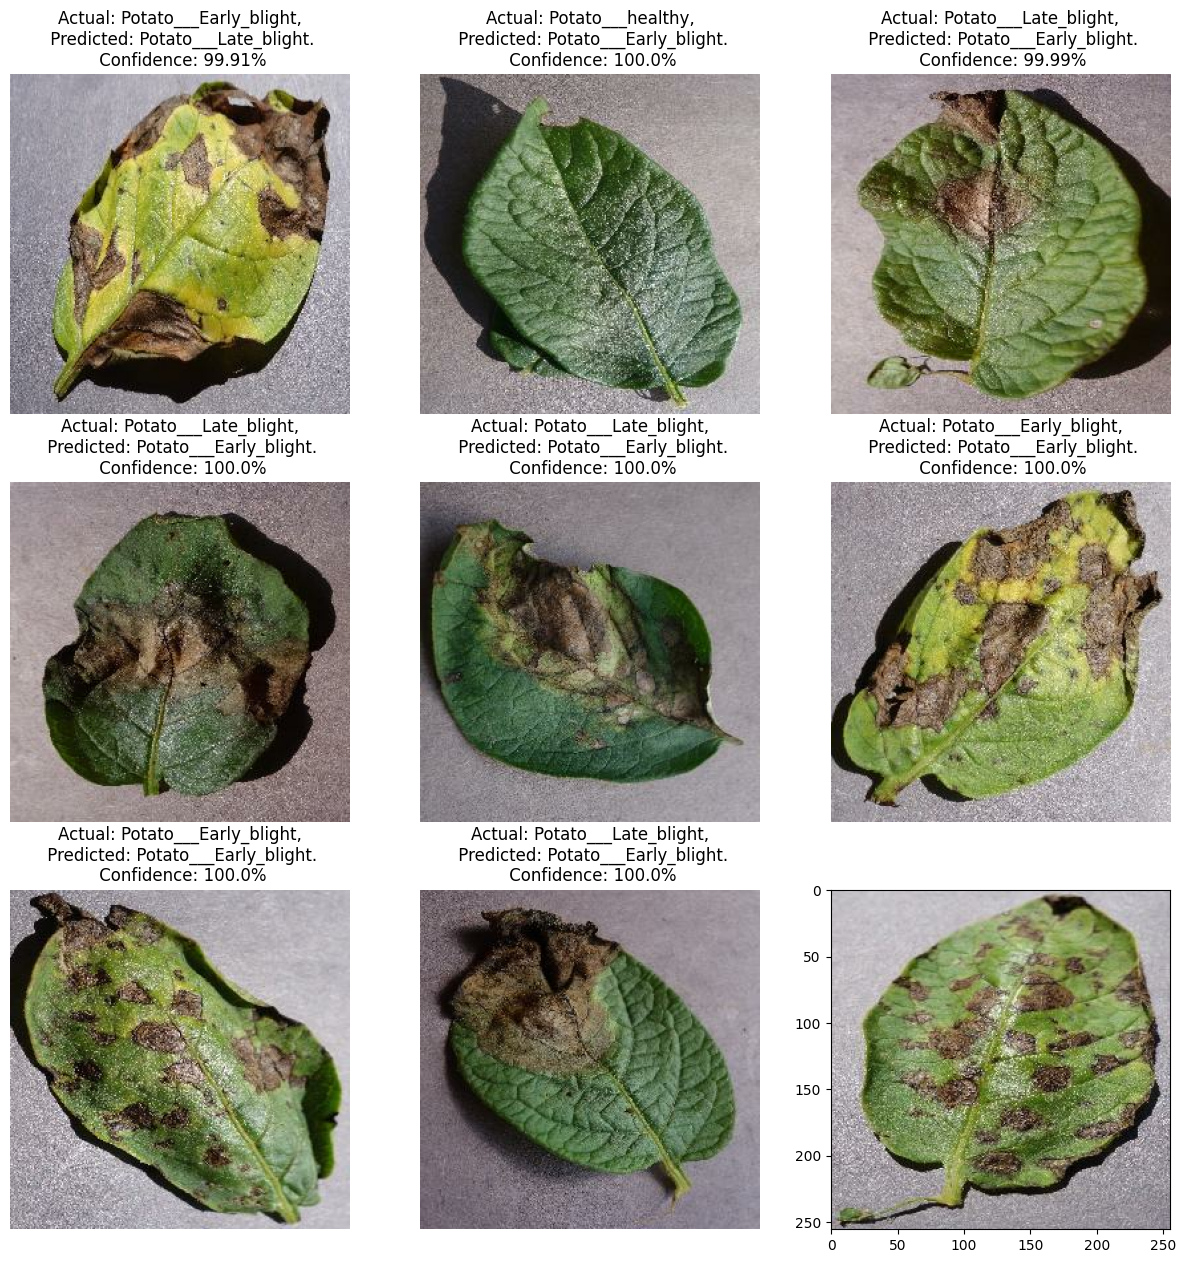

In [110]:
plt.figure(figsize=(15, 15))
for image_batch, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model1, image_batch[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")